In [ ]:
import pandas as pd
df=pd.read_excel('/content/Sample - Superstore.xls')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
current_date=df["Order Date"].max()#db last date                                       #RECENCY
print(current_date)
recency_data=df.groupby("Customer ID")["Order Date"].max().reset_index()
print(recency_data.head())
recency_data["Recency"]=(current_date-recency_data["Order Date"]).dt.days
print(recency_data[["Customer ID","Recency"]].head(10))

2017-12-30 00:00:00
  Customer ID Order Date
0    AA-10315 2017-06-29
1    AA-10375 2017-12-11
2    AA-10480 2017-04-15
3    AA-10645 2017-11-05
4    AB-10015 2016-11-10
  Customer ID  Recency
0    AA-10315      184
1    AA-10375       19
2    AA-10480      259
3    AA-10645       55
4    AB-10015      415
5    AB-10060       54
6    AB-10105       41
7    AB-10150       41
8    AB-10165       25
9    AB-10255      166


In [ ]:
frequency_data=df.groupby("Customer ID")["Order ID"].nunique().reset_index()          #FREQUENCY
frequency_data.columns=["Customer ID","Frequency"]
print(frequency_data)

    Customer ID  Frequency
0      AA-10315          5
1      AA-10375          9
2      AA-10480          4
3      AA-10645          6
4      AB-10015          3
..          ...        ...
788    XP-21865         11
789    YC-21895          5
790    YS-21880          8
791    ZC-21910         13
792    ZD-21925          5

[793 rows x 2 columns]


In [ ]:
df['TotalPrice']=df['Sales']

In [ ]:
monetary_data=df.groupby("Customer ID")["TotalPrice"].sum().reset_index()          #MONETARY
monetary_data.columns=["Customer ID","Monetary"]
print(monetary_data.head(10))

  Customer ID   Monetary
0    AA-10315   5563.560
1    AA-10375   1056.390
2    AA-10480   1790.512
3    AA-10645   5086.935
4    AB-10015    886.156
5    AB-10060   7755.620
6    AB-10105  14473.571
7    AB-10150    966.710
8    AB-10165   1113.838
9    AB-10255    914.532


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
rfm_df=pd.merge(recency_data,frequency_data)
rfm_df=pd.merge(rfm_df,monetary_data,on="Customer ID")
rfm_df

,Customer ID,Order Date,Recency,Frequency,Monetary
0,AA-10315,2017-06-29,184,5,5563.560
1,AA-10375,2017-12-11,19,9,1056.390
2,AA-10480,2017-04-15,259,4,1790.512
3,AA-10645,2017-11-05,55,6,5086.935
4,AB-10015,2016-11-10,415,3,886.156
...,...,...,...,...,...
788,XP-21865,2017-11-17,43,11,2374.658
789,YC-21895,2017-12-26,4,5,5454.350
790,YS-21880,2017-12-21,9,8,6720.444
791,ZC-21910,2017-11-06,54,13,8025.707


In [ ]:
df_new=rfm_df.drop(["Customer ID","Order Date"],axis=1)
df_new

,Recency,Frequency,Monetary
0,184,5,5563.560
1,19,9,1056.390
2,259,4,1790.512
3,55,6,5086.935
4,415,3,886.156
...,...,...,...
788,43,11,2374.658
789,4,5,5454.350
790,9,8,6720.444
791,54,13,8025.707


In [ ]:
wcss=[]
for k in range(2,11):
  model=KMeans(n_clusters=k,init='k-means++',random_state=42)
  model.fit(df_new)
  wcss.append(model.inertia_)
wcss

[2200766080.437507,
 1211310108.7267065,
 717765045.5696958,
 508710581.48812014,
 413472830.0203743,
 350075874.5762173,
 226508587.9320538,
 167492152.38687587,
 136655486.18311137]

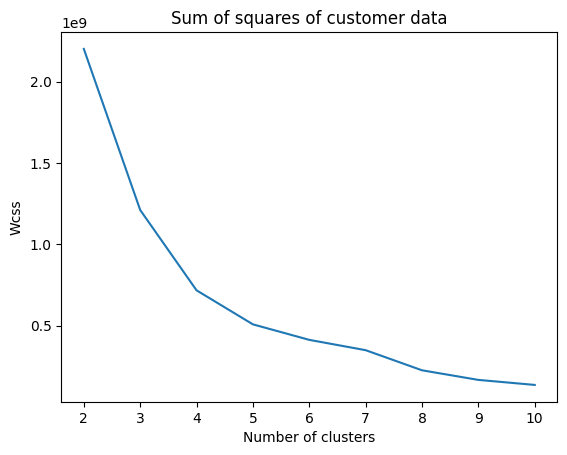

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2,11),wcss)
plt.title("Sum of squares of customer data")
plt.xlabel("Number of clusters")
plt.ylabel("Wcss")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(df_new)
df_new['cluster']=kmeans.labels_
df_new

,Recency,Frequency,Monetary,cluster
0,184,5,5563.560,2
1,19,9,1056.390,0
2,259,4,1790.512,0
3,55,6,5086.935,2
4,415,3,886.156,0
...,...,...,...,...
788,43,11,2374.658,0
789,4,5,5454.350,2
790,9,8,6720.444,2
791,54,13,8025.707,1


In [ ]:
silhouette_avg=silhouette_score(df_new,kmeans.labels_)
print(silhouette_avg)

0.5702051180044176


In [ ]:
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit(df_new)
df_new['cluster']=kmeans.labels_
df_new

,Recency,Frequency,Monetary,cluster
0,184,5,5563.560,1
1,19,9,1056.390,0
2,259,4,1790.512,0
3,55,6,5086.935,1
4,415,3,886.156,0
...,...,...,...,...
788,43,11,2374.658,2
789,4,5,5454.350,1
790,9,8,6720.444,1
791,54,13,8025.707,1


In [ ]:
silhouette_avg=silhouette_score(df_new,kmeans.labels_)
print(silhouette_avg)

0.5560352040505081


In [ ]:
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(df_new)
df_new['cluster']=kmeans.labels_
df_new

,Recency,Frequency,Monetary,cluster
0,184,5,5563.560,2
1,19,9,1056.390,4
2,259,4,1790.512,4
3,55,6,5086.935,2
4,415,3,886.156,4
...,...,...,...,...
788,43,11,2374.658,0
789,4,5,5454.350,2
790,9,8,6720.444,1
791,54,13,8025.707,1


In [ ]:
silhouette_avg=silhouette_score(df_new,kmeans.labels_)
print(silhouette_avg)

0.5484438725264383


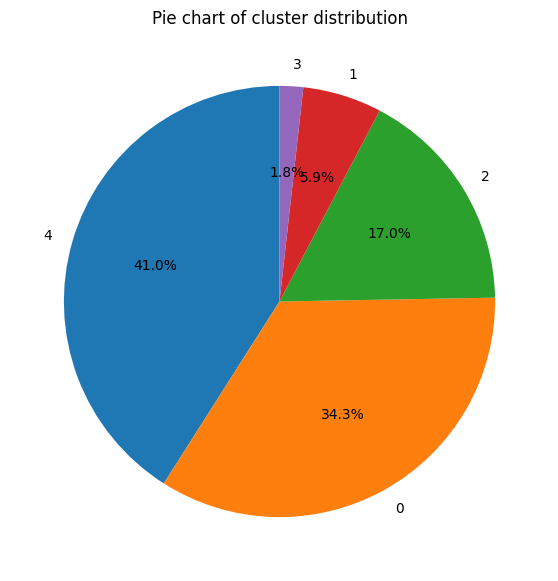

In [ ]:
cluster_counts=df_new['cluster'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(cluster_counts,labels=cluster_counts.index,autopct="%1.1f%%",startangle=90)
plt.title("Pie chart of cluster distribution")
plt.show()

In [ ]:
#Ranking
rfm_df['r_rank']=rfm_df['Recency'].rank(ascending=False)#give higher rank to the customers with lower recency values
rfm_df['f_rank']=rfm_df['Frequency'].rank(ascending=True)#here lower the frequency lower the rank
rfm_df['m_rank']=rfm_df['Monetary'].rank(ascending=True)
rfm_df

,Customer ID,Order Date,Recency,Frequency,Monetary,f_rank,m_rank,r_rank
0,AA-10315,2017-06-29,184,5,5563.560,262.5,702.0,195.5
1,AA-10375,2017-12-11,19,9,1056.390,670.0,182.0,685.5
2,AA-10480,2017-04-15,259,4,1790.512,147.5,323.0,140.0
3,AA-10645,2017-11-05,55,6,5086.935,383.0,679.0,463.5
4,AB-10015,2016-11-10,415,3,886.156,73.0,142.0,71.5
...,...,...,...,...,...,...,...,...
788,XP-21865,2017-11-17,43,11,2374.658,756.0,419.0,516.0
789,YC-21895,2017-12-26,4,5,5454.350,262.5,695.0,770.5
790,YS-21880,2017-12-21,9,8,6720.444,593.5,734.0,728.5
791,ZC-21910,2017-11-06,54,13,8025.707,789.0,756.0,470.5


In [ ]:
rfm_df['r_rank_norm']=(rfm_df['r_rank']/rfm_df['r_rank'].max())*100 #give higher rank to the customers with lower recency values
rfm_df['f_rank_norm']=(rfm_df['f_rank']/rfm_df['f_rank'].max())*100 #here lower the frequency lower the rank
rfm_df['m_rank_norm']=(rfm_df['m_rank']/rfm_df['m_rank'].max())*100
rfm_df

,Customer ID,Order Date,Recency,Frequency,Monetary,f_rank,m_rank,r_rank,r_rank_norm,f_rank_norm,m_rank_norm
0,AA-10315,2017-06-29,184,5,5563.560,262.5,702.0,195.5,24.699937,33.102144,88.524590
1,AA-10375,2017-12-11,19,9,1056.390,670.0,182.0,685.5,86.607707,84.489281,22.950820
2,AA-10480,2017-04-15,259,4,1790.512,147.5,323.0,140.0,17.687934,18.600252,40.731400
3,AA-10645,2017-11-05,55,6,5086.935,383.0,679.0,463.5,58.559697,48.297604,85.624212
4,AB-10015,2016-11-10,415,3,886.156,73.0,142.0,71.5,9.033481,9.205549,17.906683
...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,2017-11-17,43,11,2374.658,756.0,419.0,516.0,65.192672,95.334174,52.837327
789,YC-21895,2017-12-26,4,5,5454.350,262.5,695.0,770.5,97.346810,33.102144,87.641866
790,YS-21880,2017-12-21,9,8,6720.444,593.5,734.0,728.5,92.040430,74.842371,92.559899
791,ZC-21910,2017-11-06,54,13,8025.707,789.0,756.0,470.5,59.444093,99.495586,95.334174


In [ ]:
#we are giving equal weights to recency(r),frequecy(f)and monetary(m) as 0.33
#if we are asked to give high weightage to frequency then give as below
#rfm_df["rfm_score"]=0.15*rfm_df["r_rank_norm"]+0.55*rfm_df["f_rank_norm"]+0.25*rfm_df["m_rank_norm"]
#adding 0.15+0.55+0.25 should be equal to 1
rfm_df["rfm_score"]=0.33*rfm_df["r_rank_norm"]+0.33*rfm_df["f_rank_norm"]+0.33*rfm_df["m_rank_norm"]
rfm_df[["Customer ID","rfm_score"]]

,Customer ID,rfm_score
0,AA-10315,48.287801
1,AA-10375,64.035777
2,AA-10480,25.416463
3,AA-10645,63.518899
4,AB-10015,11.928085
...,...,...
788,XP-21865,70.410177
789,YC-21895,71.969971
790,YS-21880,85.616091
791,ZC-21910,83.910372


In [ ]:
import numpy as np
rfm_df["Customer_segment"] = np.where(rfm_df['rfm_score'] > 45,
                                      "Top Customers",
                                      (np.where(
                                        rfm_df['rfm_score'] > 40,
                                        "High value Customer",
                                        (np.where(
                                rfm_df['rfm_score'] > 30,
                             "Medium Value Customer",
                             np.where(rfm_df['rfm_score'] > 1.5,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['Customer ID', 'rfm_score', 'Customer_segment']].head(20)

,Customer ID,rfm_score,Customer_segment
0,AA-10315,48.287801,Top Customers
1,AA-10375,64.035777,Top Customers
2,AA-10480,25.416463,Low Value Customers
3,AA-10645,63.518899,Top Customers
4,AB-10015,11.928085,Low Value Customers
5,AB-10060,75.608354,Top Customers
6,AB-10105,85.184453,Top Customers
7,AB-10150,39.845865,Medium Value Customer
8,AB-10165,59.600560,Top Customers
9,AB-10255,42.858420,High value Customer


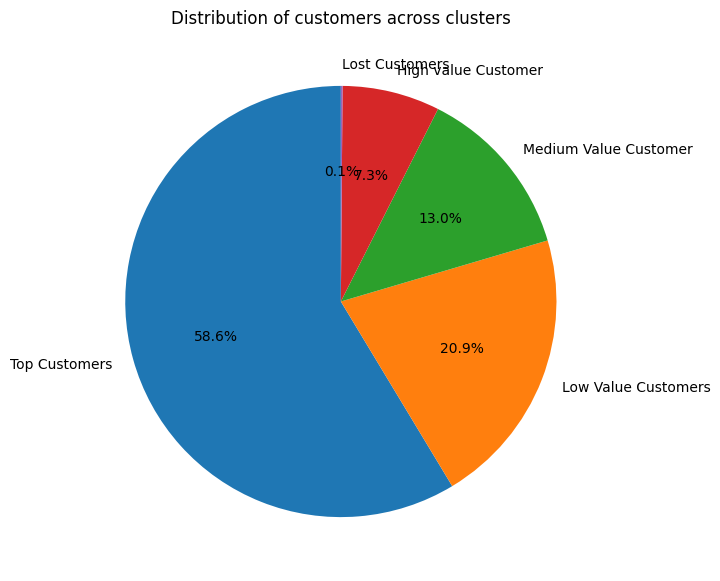

In [ ]:
cluster_counts=rfm_df['Customer_segment'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(cluster_counts,labels=cluster_counts.index,autopct="%1.1f%%",startangle=90)
plt.title("Distribution of customers across clusters")
plt.show()